<a href="https://colab.research.google.com/github/POSTI-25/CSI_task/blob/main/csi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U gdown

import gdown

# Download full_org.zip
gdown.download(id='1smWwfAjMTi9gUDsahr2SqfDZM58YVk12', output='full_org.zip', quiet=False)

# Download full_forg.zip
gdown.download(id='14DzIvdQ6r1cKJ3Qw6Ikqk09BWBuEVgDb', output='full_forg.zip', quiet=False)

# Download signature_features_dataset.csv
gdown.download(id='1M1PhCbZFudRucJGlIE5xI9j7npjMgXGd', output='signature_features_dataset.csv', quiet=False)



Downloading...
From (original): https://drive.google.com/uc?id=1smWwfAjMTi9gUDsahr2SqfDZM58YVk12
From (redirected): https://drive.google.com/uc?id=1smWwfAjMTi9gUDsahr2SqfDZM58YVk12&confirm=t&uuid=e4ee9b40-25fc-4816-bb25-6d4007e8b9c7
To: /content/full_org.zip
100%|██████████| 144M/144M [00:02<00:00, 59.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=14DzIvdQ6r1cKJ3Qw6Ikqk09BWBuEVgDb
From (redirected): https://drive.google.com/uc?id=14DzIvdQ6r1cKJ3Qw6Ikqk09BWBuEVgDb&confirm=t&uuid=58b8ab15-c021-4569-97aa-306c063b1993
To: /content/full_forg.zip
100%|██████████| 111M/111M [00:01<00:00, 58.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1M1PhCbZFudRucJGlIE5xI9j7npjMgXGd
To: /content/signature_features_dataset.csv
100%|██████████| 163k/163k [00:00<00:00, 52.3MB/s]


'signature_features_dataset.csv'

**uploading files**

In [ ]:
!ls -lh full_org.zip full_forg.zip signature_features_dataset.csv
!file full_org.zip
!file full_forg.zip

-rw-r--r-- 1 root root 106M Mar  6 08:48 full_forg.zip
-rw-r--r-- 1 root root 137M Mar  6 08:54 full_org.zip
-rw-r--r-- 1 root root 160K Mar  6 08:53 signature_features_dataset.csv
full_org.zip: Zip archive data, at least v2.0 to extract, compression method=store
full_forg.zip: Zip archive data, at least v2.0 to extract, compression method=store


**checking the uploaded folders**

In [ ]:
import zipfile
import os

# Unzip original signatures
with zipfile.ZipFile('full_org.zip', 'r') as zip_ref:
    zip_ref.extractall('full_org')

# Unzip forged signatures
with zipfile.ZipFile('full_forg.zip', 'r') as zip_ref:
    zip_ref.extractall('full_forg')

**unzipped both the files**

In [ ]:
from PIL import Image
import os

# Load original signatures from the nested directory
original_images = []
for filename in os.listdir('full_org/full_org'):
    if filename.endswith('.png'):  # Only load PNG files
        img = Image.open(os.path.join('full_org/full_org', filename))
        original_images.append(img)

# Load forged signatures (assuming they are in a similar nested structure)
forged_images = []
for filename in os.listdir('full_forg/full_forg'):  # Adjust this if needed
    if filename.endswith('.png'):  # Only load PNG files
        img = Image.open(os.path.join('full_forg/full_forg', filename))
        forged_images.append(img)

# Optional: Print the number of images loaded
print(f"Loaded {len(original_images)} original signatures.")
print(f"Loaded {len(forged_images)} forged signatures.")

Loaded 1320 original signatures.
Loaded 1320 forged signatures.



*   **loaded the original and forged images from the nested directory structure.**
*   **cheking the number of images loaded**






In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
from PIL import Image

# Helper function to extract features from a PIL image and its file path
def extract_features(image, image_path):
    # Convert PIL image to grayscale numpy array
    image = np.array(image.convert('L'))

    # Get file size (in KB)
    file_size = os.path.getsize(image_path) / 1024  # KB

    # Image dimensions
    height, width = image.shape
    aspect_ratio = width / height

    # Total ink (count of dark pixels)
    _, binary_image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)
    ink_amount = cv2.countNonZero(binary_image)

    # Average pixel intensity
    avg_intensity = np.mean(image)

    # Edge count using Canny edge detection
    edges = cv2.Canny(image, 100, 200)
    edge_count = cv2.countNonZero(edges)

    return [aspect_ratio, ink_amount, file_size, avg_intensity, edge_count]

# Prepare lists to store features and labels
features = []
labels = []

# Extract features from original (real) signatures
print("Processing original signatures...")
original_dir = 'full_org/full_org'
for filename in tqdm(os.listdir(original_dir)):
    if filename.endswith('.png'):
        file_path = os.path.join(original_dir, filename)
        img = Image.open(file_path)
        feats = extract_features(img, file_path)
        features.append(feats)
        labels.append(1)  # Label 1 for real

# Extract features from forged signatures
print("Processing forged signatures...")
forged_dir = 'full_forg/full_forg'
for filename in tqdm(os.listdir(forged_dir)):
    if filename.endswith('.png'):
        file_path = os.path.join(forged_dir, filename)
        img = Image.open(file_path)
        feats = extract_features(img, file_path)
        features.append(feats)
        labels.append(0)  # Label 0 for forged

# Create DataFrame (table)
columns = ['aspect_ratio', 'ink_amount', 'file_size_kb', 'avg_intensity', 'edge_count']
df = pd.DataFrame(features, columns=columns)
df['label'] = labels

# Show sample of the dataset
print("\nSample of the dataset:")
print(df.head())

# Optional: Save to CSV
# df.to_csv('signature_features_dataset.csv', index=False)
df.to_csv('signature_features_dataset_extracted.csv', index=False)
print("\nDataset saved as 'signature_features_dataset.csv'")



Processing original signatures...


100%|██████████| 1321/1321 [00:05<00:00, 231.53it/s]


Processing forged signatures...


100%|██████████| 1321/1321 [00:06<00:00, 204.50it/s]


Sample of the dataset:
   aspect_ratio  ink_amount  file_size_kb  avg_intensity  edge_count  label
0      1.183099        7014     80.040039     238.183957        4082      1
1      1.496437        5942    135.461914     233.401832        3913      1
2      1.552124        5241     55.208984     231.207073        2888      1
3      1.391304        3778     55.922852     237.867386        2355      1
4      1.166667        9980    153.821289     240.220491        5913      1

Dataset saved as 'signature_features_dataset.csv'




*   **extracting features which will later on be used to do analysis**
*   **features extracted -**

1.   ink amount - forged images seem fader and look like they use less ink whereas original images have darker ink amount
2.   pixel intensity - since forged images use less ink they have to be brighter. original ones are not that bright comparatively
3.  edge count - forged ones: less detailed and blurred and original: sharper strokes
4.  file size - original ones have size in the range 90 to 150 kb. whereas most forged ones are larger or comratively smaller in size.
5.  aspect ratio - width and height comparision of both



*   **creating an excel file of all the extracted features named - signatures_features_dataset.csv**

https://drive.google.com/file/d/1M1PhCbZFudRucJGlIE5xI9j7npjMgXGd/view?usp=sharing

*   **(label 0 - FORGED IMAGES)**
*   **(label 1 - ORIGINAL IMAGES)**




# New Section

In [ ]:
%%writefile analyze_signatures.py

# ===========================
# Signature Features Analysis
# ===========================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('signature_features_dataset.csv')

# 1. Quick check of the data
print("\n=== Dataset Head ===")
print(df.head())

print("\n=== Dataset Info ===")
print(df.info())

print("\n=== Dataset Description ===")
print(df.describe())

# 2. Check class distribution
print("\n=== Class Distribution ===")
print(df['label'].value_counts())
print("\nLabels: 1 = Original, 0 = Forged")

# 3. Compare mean feature values for original vs forged
print("\n=== Mean Feature Values by Class ===")
mean_features = df.groupby('label').mean()
print(mean_features)

# 4. Visualize feature distributions
features = ['ink_amount', 'avg_intensity', 'edge_count', 'aspect_ratio', 'file_size_kb']

print("\n=== Plotting Feature Distributions ===")
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='label', kde=True, palette='Set1')
    plt.title(f'{feature.capitalize()} Distribution (Original vs Forged)')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Label', labels=['Forged (0)', 'Original (1)'])
    plt.tight_layout()
    plt.show()

# 5. Check feature correlations
print("\n=== Plotting Correlation Heatmap ===")
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 6. Feature Importance using Random Forest
print("\n=== Feature Importance (Random Forest) ===")
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n=== Analysis Complete ===")


Writing analyze_signatures.py


In [ ]:
!python3 analyze_signatures.py



=== Dataset Head ===
   aspect_ratio  ink_amount  file_size_kb  avg_intensity  edge_count  label
0      1.636364        9753    128.879883     237.336965        3905      1
1      1.246291        7652     77.022461     236.931405        4275      1
2      1.399538        7210    135.205078     239.307407        4539      1
3      1.762611        4228     98.406250     233.898261        2669      1
4      1.468822       13546    143.720703     236.590737        6079      1

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   aspect_ratio   2640 non-null   float64
 1   ink_amount     2640 non-null   int64  
 2   file_size_kb   2640 non-null   float64
 3   avg_intensity  2640 non-null   float64
 4   edge_count     2640 non-null   int64  
 5   label          2640 non-null   int64  
dtypes: float64(3), int64(3)
memory usage:

**BASIC ANALYSIS OBTAINED -**

*   forged ones are - wider and brighter
*   original ones are - more ink and large file size

(running this file as .py for analysis in text form)



=== Dataset Head ===
   aspect_ratio  ink_amount  file_size_kb  avg_intensity  edge_count  label
0      1.636364        9753    128.879883     237.336965        3905      1
1      1.246291        7652     77.022461     236.931405        4275      1
2      1.399538        7210    135.205078     239.307407        4539      1
3      1.762611        4228     98.406250     233.898261        2669      1
4      1.468822       13546    143.720703     236.590737        6079      1

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   aspect_ratio   2640 non-null   float64
 1   ink_amount     2640 non-null   int64  
 2   file_size_kb   2640 non-null   float64
 3   avg_intensity  2640 non-null   float64
 4   edge_count     2640 non-null   int64  
 5   label          2640 non-null   int64  
dtypes: float64(3), int64(3)
memory usage:

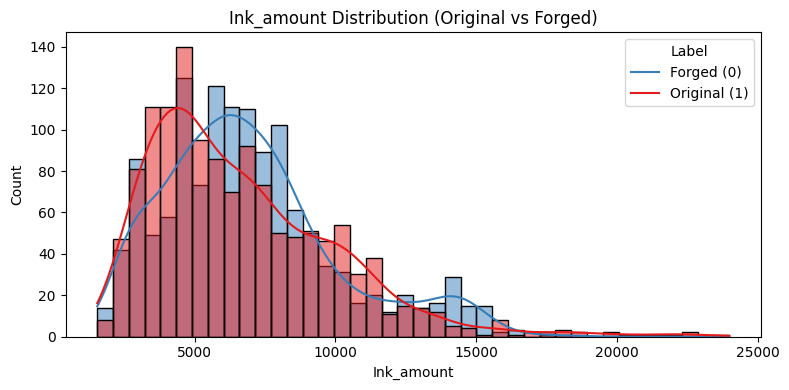

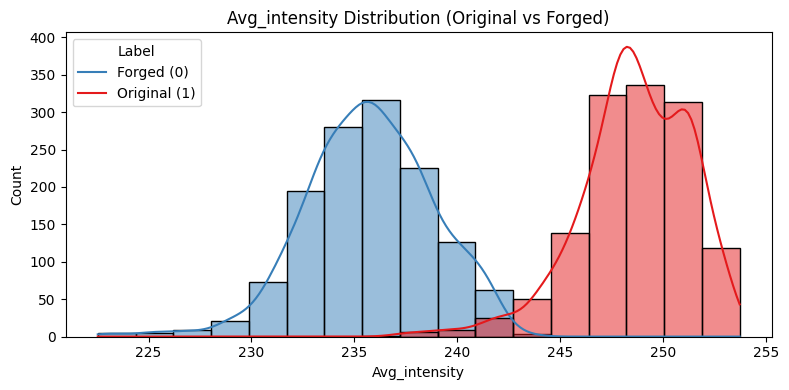

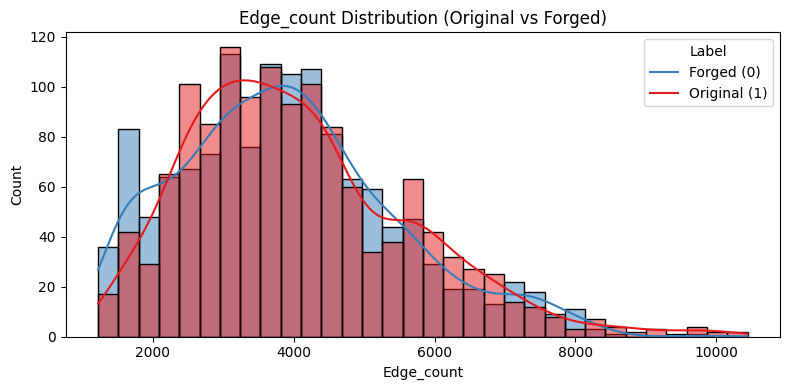

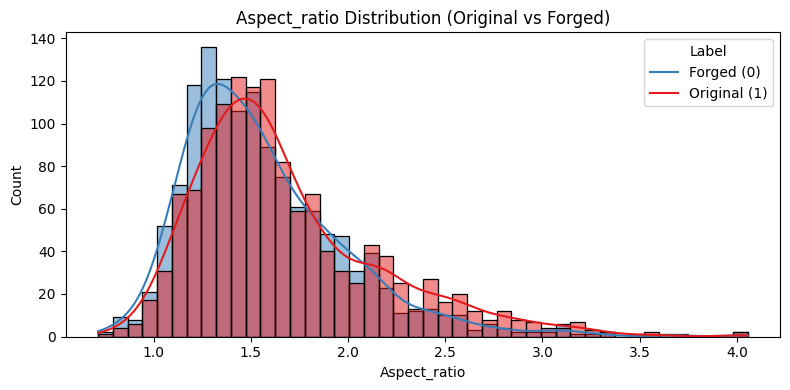

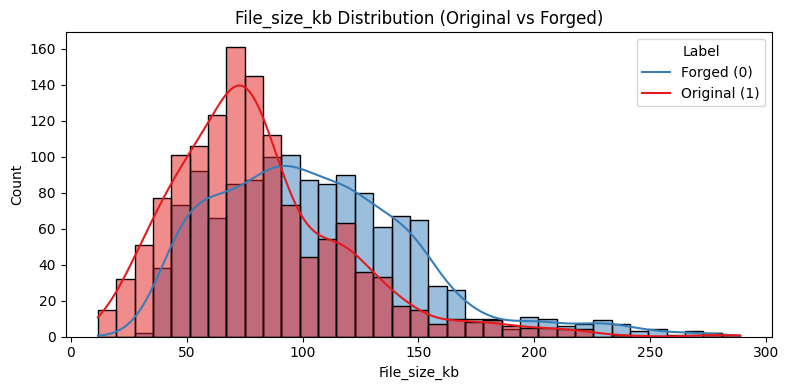


=== Plotting Correlation Heatmap ===


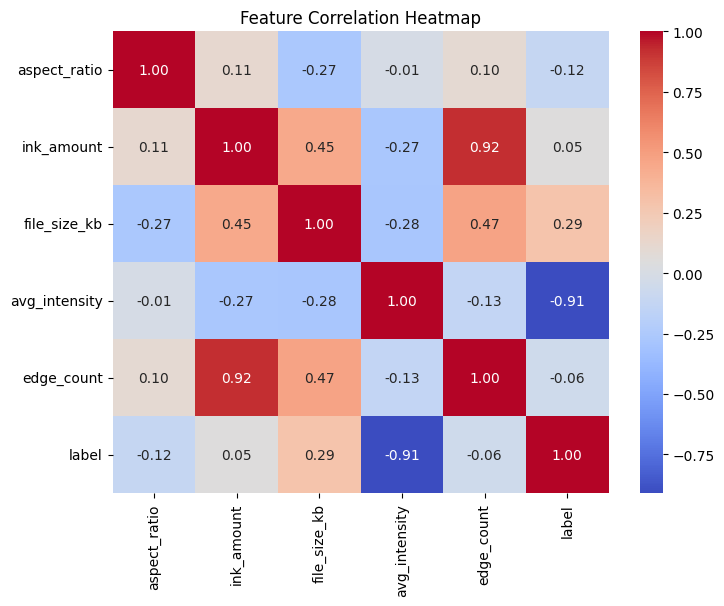


=== Feature Importance (Random Forest) ===
         Feature  Importance
3  avg_intensity    0.854356
2   file_size_kb    0.060419
4     edge_count    0.039665
1     ink_amount    0.031431
0   aspect_ratio    0.014128


<ipython-input-9-1c7c6c34e8b3>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


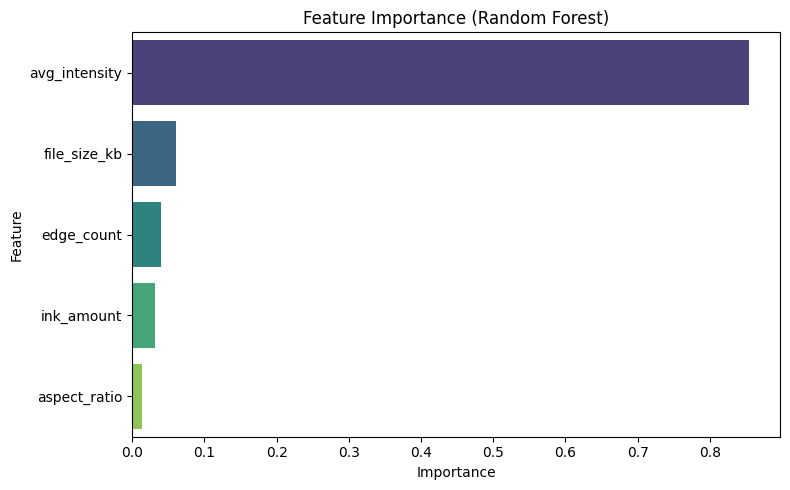


=== Analysis Complete ===


In [ ]:
%matplotlib inline

# ===========================
# Signature Features Analysis
# ===========================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('signature_features_dataset.csv')

# 1. Quick check of the data
print("\n=== Dataset Head ===")
print(df.head())

print("\n=== Dataset Info ===")
print(df.info())

print("\n=== Dataset Description ===")
print(df.describe())

# 2. Check class distribution
print("\n=== Class Distribution ===")
print(df['label'].value_counts())
print("\nLabels: 1 = Original, 0 = Forged")

# 3. Compare mean feature values for original vs forged
print("\n=== Mean Feature Values by Class ===")
mean_features = df.groupby('label').mean()
print(mean_features)

# 4. Visualize feature distributions
features = ['ink_amount', 'avg_intensity', 'edge_count', 'aspect_ratio', 'file_size_kb']

print("\n=== Plotting Feature Distributions ===")
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='label', kde=True, palette='Set1')
    plt.title(f'{feature.capitalize()} Distribution (Original vs Forged)')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Label', labels=['Forged (0)', 'Original (1)'])
    plt.tight_layout()
    plt.show()

# 5. Check feature correlations
print("\n=== Plotting Correlation Heatmap ===")
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 6. Feature Importance using Random Forest
print("\n=== Feature Importance (Random Forest) ===")
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n=== Analysis Complete ===")

**Graphs of all the analysis and comparision of the 5 extracted features. Using random forest binary classifier we find that average pixel intensity is the most important aspect for comparison and training the model.**

(running the previous block of code again but this time with matplotlib to obtain graphs - You execute it like a .py script (!python analyze_signatures.py), which won’t show the plots inline, because it's just a console output.)



✅ Model Accuracy: 99.81%


=== Classification Report ===
              precision    recall  f1-score   support

  Forged (0)       1.00      1.00      1.00       264
Original (1)       1.00      1.00      1.00       264

    accuracy                           1.00       528
   macro avg       1.00      1.00      1.00       528
weighted avg       1.00      1.00      1.00       528


=== Confusion Matrix ===


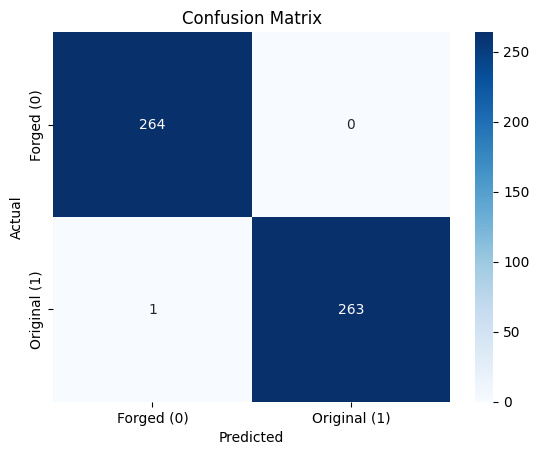

<ipython-input-10-5f1638cabc4c>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


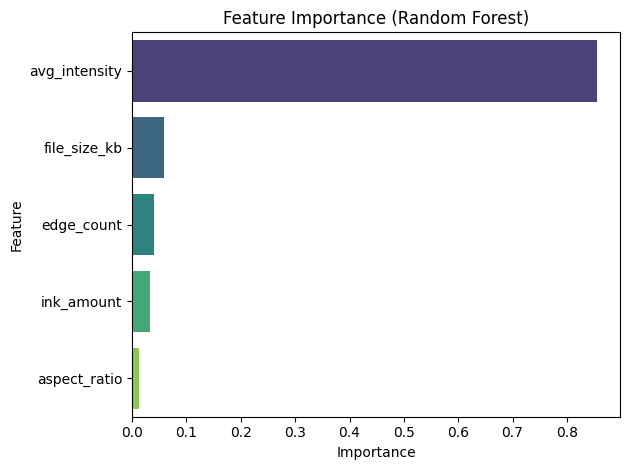

In [ ]:
# ===========================
# Signature Classification
# ===========================

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('signature_features_dataset.csv')

# Define features and labels
X = df.drop('label', axis=1)
y = df['label']

# Split into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(
    n_estimators=100, random_state=42
)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy * 100:.2f}%\n")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Forged (0)', 'Original (1)']))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Forged (0)', 'Original (1)'],
            yticklabels=['Forged (0)', 'Original (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optional: Feature Importances visualization again
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**training the Random Forest based on my data**

**testing part -**
**importing any image to check:**


*   **if you are importing an original image - enter 1**
*   **if you are importing forged image - enter 0**

**testing if prediction is right or not**


In [ ]:
from google.colab import files
import numpy as np
from PIL import Image
import cv2
import os

# Upload the signature image(s)
uploaded = files.upload()

# Define feature extraction (same as before)
def extract_features_for_test(image_path):
    img = Image.open(image_path).convert('L')
    img_np = np.array(img)

    file_size = os.path.getsize(image_path) / 1024  # KB
    height, width = img_np.shape
    aspect_ratio = width / height

    _, binary_image = cv2.threshold(img_np, 200, 255, cv2.THRESH_BINARY_INV)
    ink_amount = cv2.countNonZero(binary_image)

    avg_intensity = np.mean(img_np)
    edges = cv2.Canny(img_np, 100, 200)
    edge_count = cv2.countNonZero(edges)

    return [aspect_ratio, ink_amount, file_size, avg_intensity, edge_count]

# Loop through uploaded images
for filename in uploaded.keys():
    print(f"\nUploaded file: {filename}")

    # Ask you for the true label
    true_label = int(input(f"What is the actual label of {filename}? (1 = Original, 0 = Forged): "))

    # Extract features from uploaded image
    features = extract_features_for_test(filename)
    features_array = np.array(features).reshape(1, -1)

    # Make prediction
    prediction = model.predict(features_array)[0]

    result = "ORIGINAL" if prediction == 1 else "FORGED"
    print(f"✅ Model Prediction: {result}")

    if prediction == true_label:
        print("🎉 The prediction is CORRECT!")
    else:
        print("❌ The prediction is WRONG!")


Saving original_55_6.png to original_55_6.png

Uploaded file: original_55_6.png
What is the actual label of original_55_6.png? (1 = Original, 0 = Forged): 1
✅ Model Prediction: ORIGINAL
🎉 The prediction is CORRECT!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


*   **if you are uloading forged image - enter 0**
*   **if you are importing an original image - enter 1**


